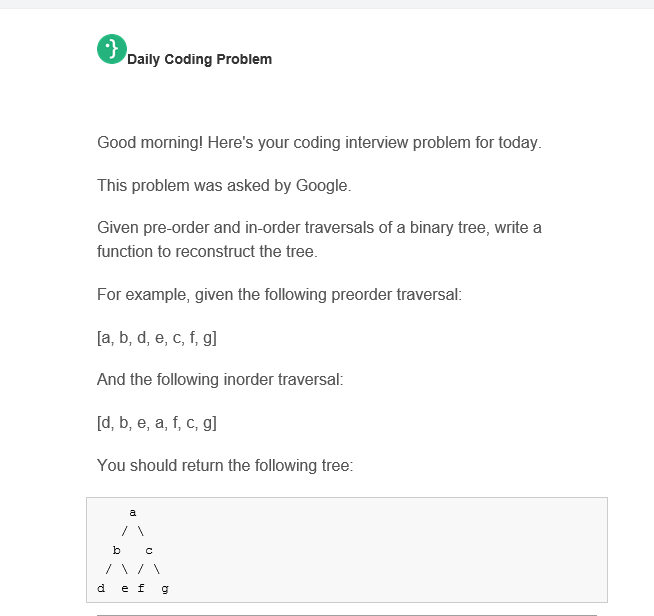

In [23]:
from IPython.display import Image

Image(filename="preorder_inorder.PNG")

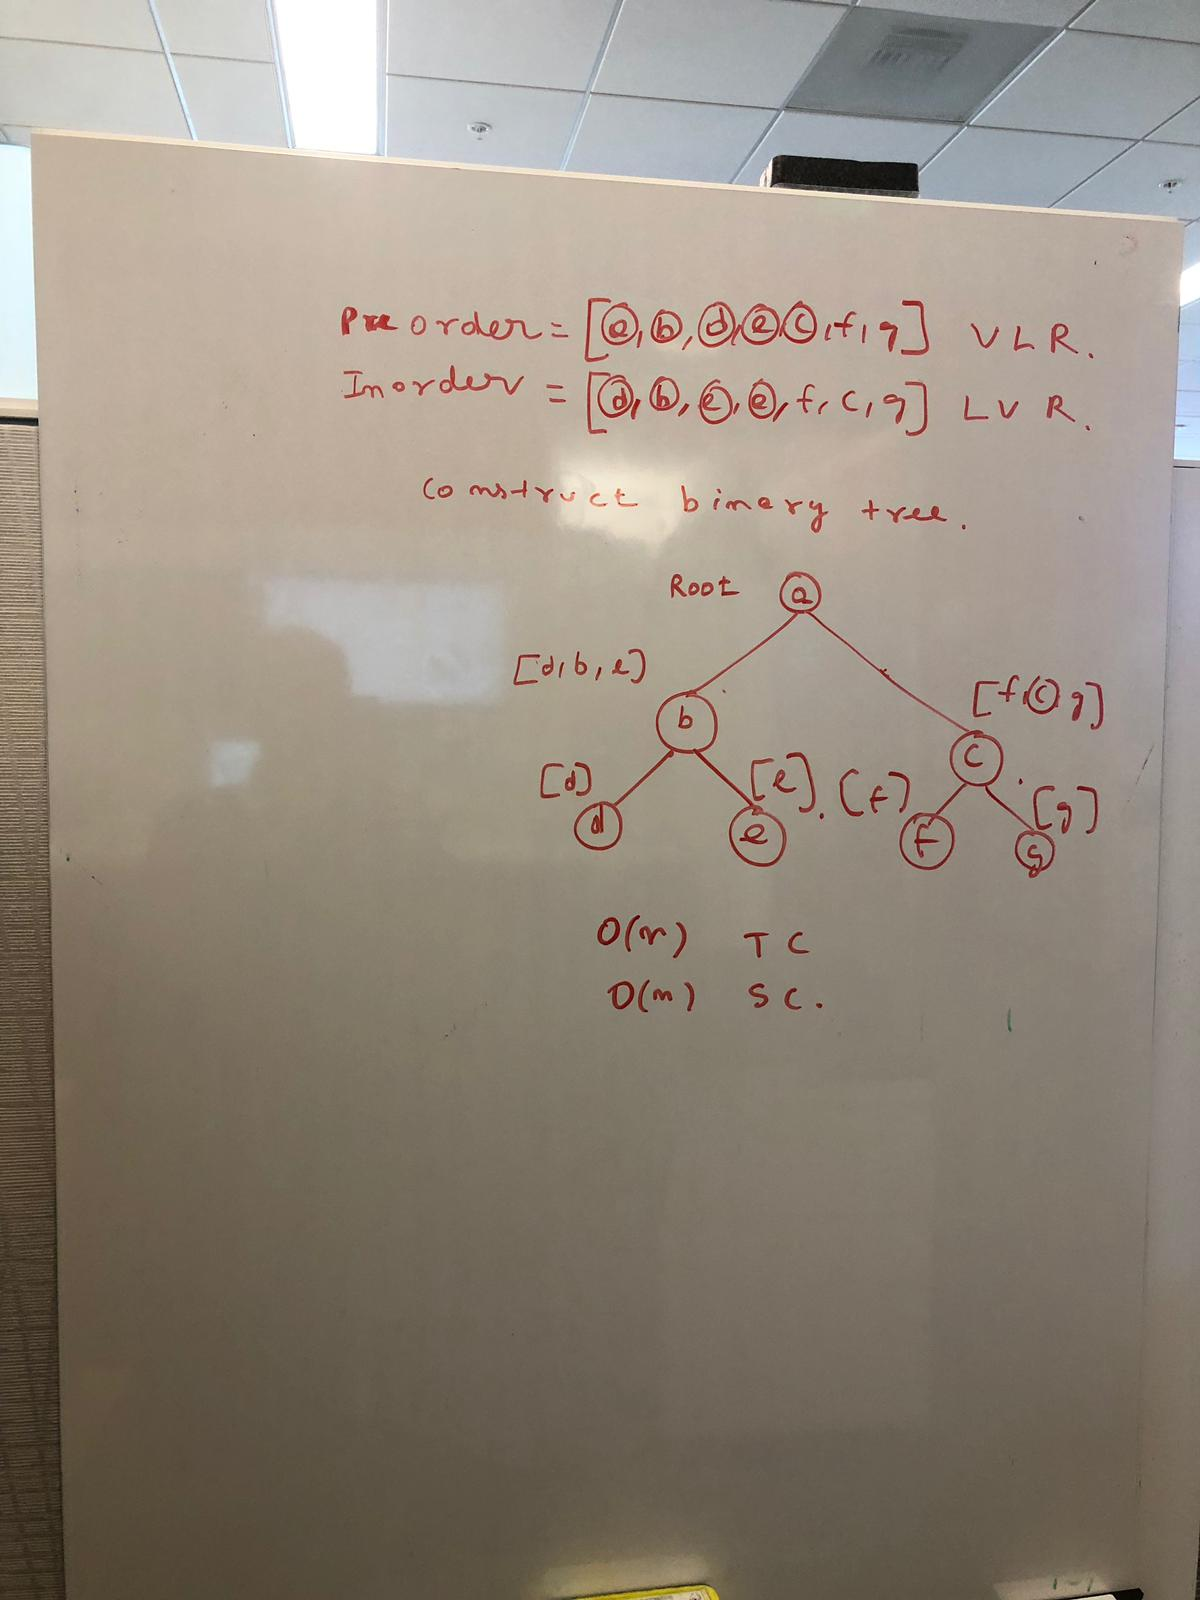

In [24]:
Image(filename="pre_inorder.jpeg")

In [22]:
class TreeNode(object):
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None

In [12]:
def levelOrder(root):
        """
        :type root: TreeNode
        :rtype: List[List[int]]
        """
        levels = []
        if not root:
            return levels
        
        def helper(node, level):
            # start the current level
            if len(levels) == level:
                levels.append([])

            # append the current node value
            levels[level].append(node.val)

            # process child nodes for the next level
            if node.left:
                helper(node.left, level + 1)
            if node.right:
                helper(node.right, level + 1)
            
        helper(root, 0)
        return levels

In [8]:
#O(n^2)
def buildTree(preorder, inorder):
    """
    :type preorder: List[int]
    :type inorder: List[int]
    :rtype: TreeNode
     """
    if not inorder:
        return None
    root=preorder[0]
    rnode=TreeNode(root)
    length=len(preorder)
    index=inorder.index(root)
    if index:
        rnode.left=buildTree(preorder[1:index+1],inorder[:index])
    if index < length-1:
        rnode.right=buildTree(preorder[index+1:],inorder[index+1:])
    return rnode

In [17]:
def buildTree_optimized(preorder, inorder):
    """
    :type preorder: List[int]
    :type inorder: List[int]
    :rtype: TreeNode
     """
    def helper(in_left = 0, in_right = len(inorder)):
        nonlocal pre_idx
        # if there is no elements to construct subtrees
        if in_left == in_right:
            return None
            
        # pick up pre_idx element as a root
        root_val = preorder[pre_idx]
        root = TreeNode(root_val)

        # root splits inorder list
        # into left and right subtrees
        index = idx_map[root_val]

        # recursion 
        pre_idx += 1
        # build left subtree
        root.left = helper(in_left, index)
        # build right subtree
        root.right = helper(index + 1, in_right)
        return root
    # start from first preorder element
    pre_idx = 0
    # build a hashmap value -> its index
    idx_map = {val:idx for idx, val in enumerate(inorder)} 
    return helper()
#TC:O(n)
#SC:O(n)

In [14]:
preorder=['a', 'b', 'd', 'e', 'c', 'f', 'g']
inorder=['d', 'b', 'e', 'a', 'f', 'c', 'g']
t=(buildTree( preorder, inorder))


In [15]:
levelOrder(t)

[['a'], ['b', 'c'], ['d', 'e', 'f', 'g']]

In [18]:
t1=(buildTree_optimized( preorder, inorder))

In [19]:
levelOrder(t1)

[['a'], ['b', 'c'], ['d', 'e', 'f', 'g']]

In [20]:
idx_map = {val:idx for idx, val in enumerate(inorder)}

In [21]:
idx_map

{'d': 0, 'b': 1, 'e': 2, 'a': 3, 'f': 4, 'c': 5, 'g': 6}